In [2]:
import os.path
import warnings
import pathlib
import matplotlib.pyplot as plt
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown as md

from report import *

#Shows all results of a cell output
InteractiveShell.ast_node_interactivity = "all"

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)

#Define here where the data and results are stored
data_dir=os.path.join(parent_dir,"data")
result_dir=os.path.join(parent_dir,'results',"GMM_Original")
gmm_dir=os.path.join(result_dir,"gmm_res_full")
scores_path=os.path.join(gmm_dir,"all_real_images_scores.txt")

models = ['40i','320i','330e', '730Li', '740Li']

#settings for display
divisor=100
depth=4
bins=6
width=22

results=load_score(scores_path,bins=bins,divisor=divisor)
results['filename'] = results.apply(lambda row: os.path.split(row.file)[1], axis=1)

#adds the model information
for model in models:
    model_path = pathlib.Path(os.path.join(data_dir,model,f"model_inscription_{model}"))
    model_files = list(model_path.glob('*.jpeg')) + list(model_path.glob('*.jpg')) + list(model_path.glob('*.png'))
    model_files=[file.name for file in model_files ]
    results.loc[results[results['filename'].isin(model_files)].index.values,"model"]=model
    results=results[['file','filename','model','score','score_bin','score_bin_nr']]

# GMM Scores Real images

GMM computation of scores for the models different real images, based on the BMW inception model and CV

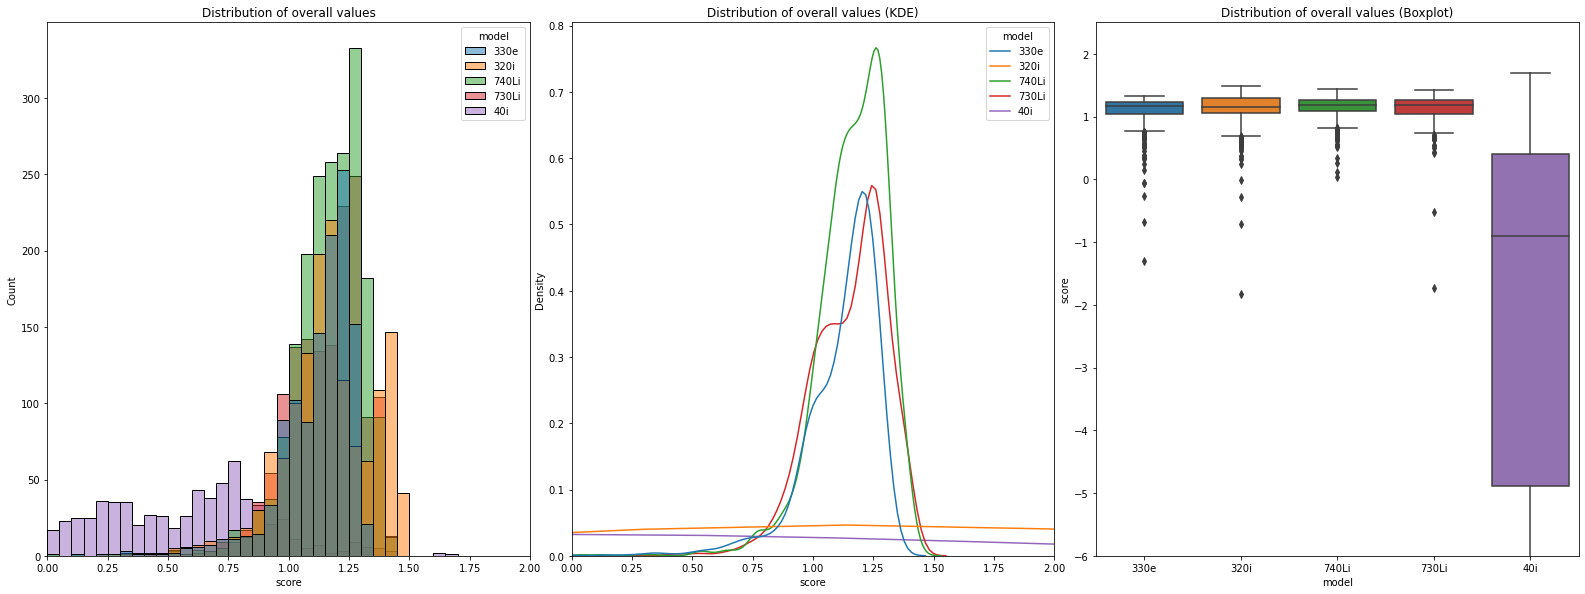

## GMM Model: 40i

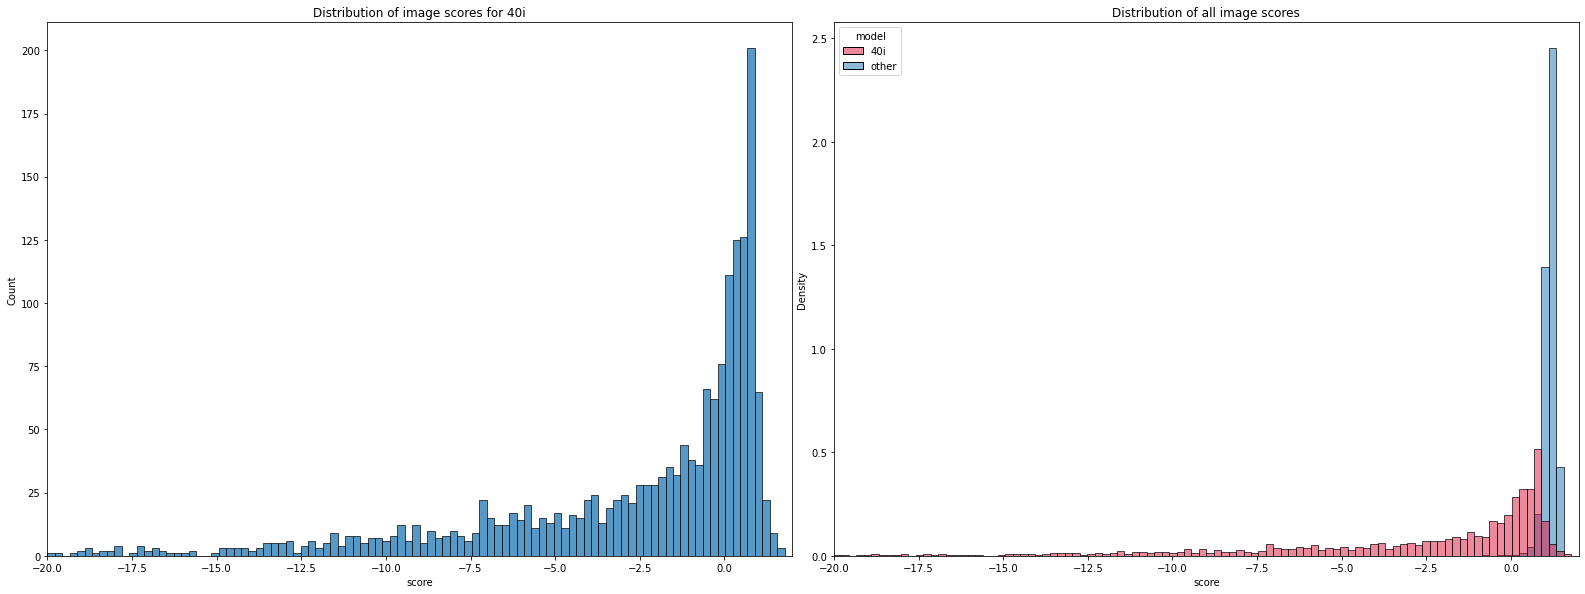

Distribution of scores and best five images for images split into 6 buckets. 
The score is divided by 100 for readability

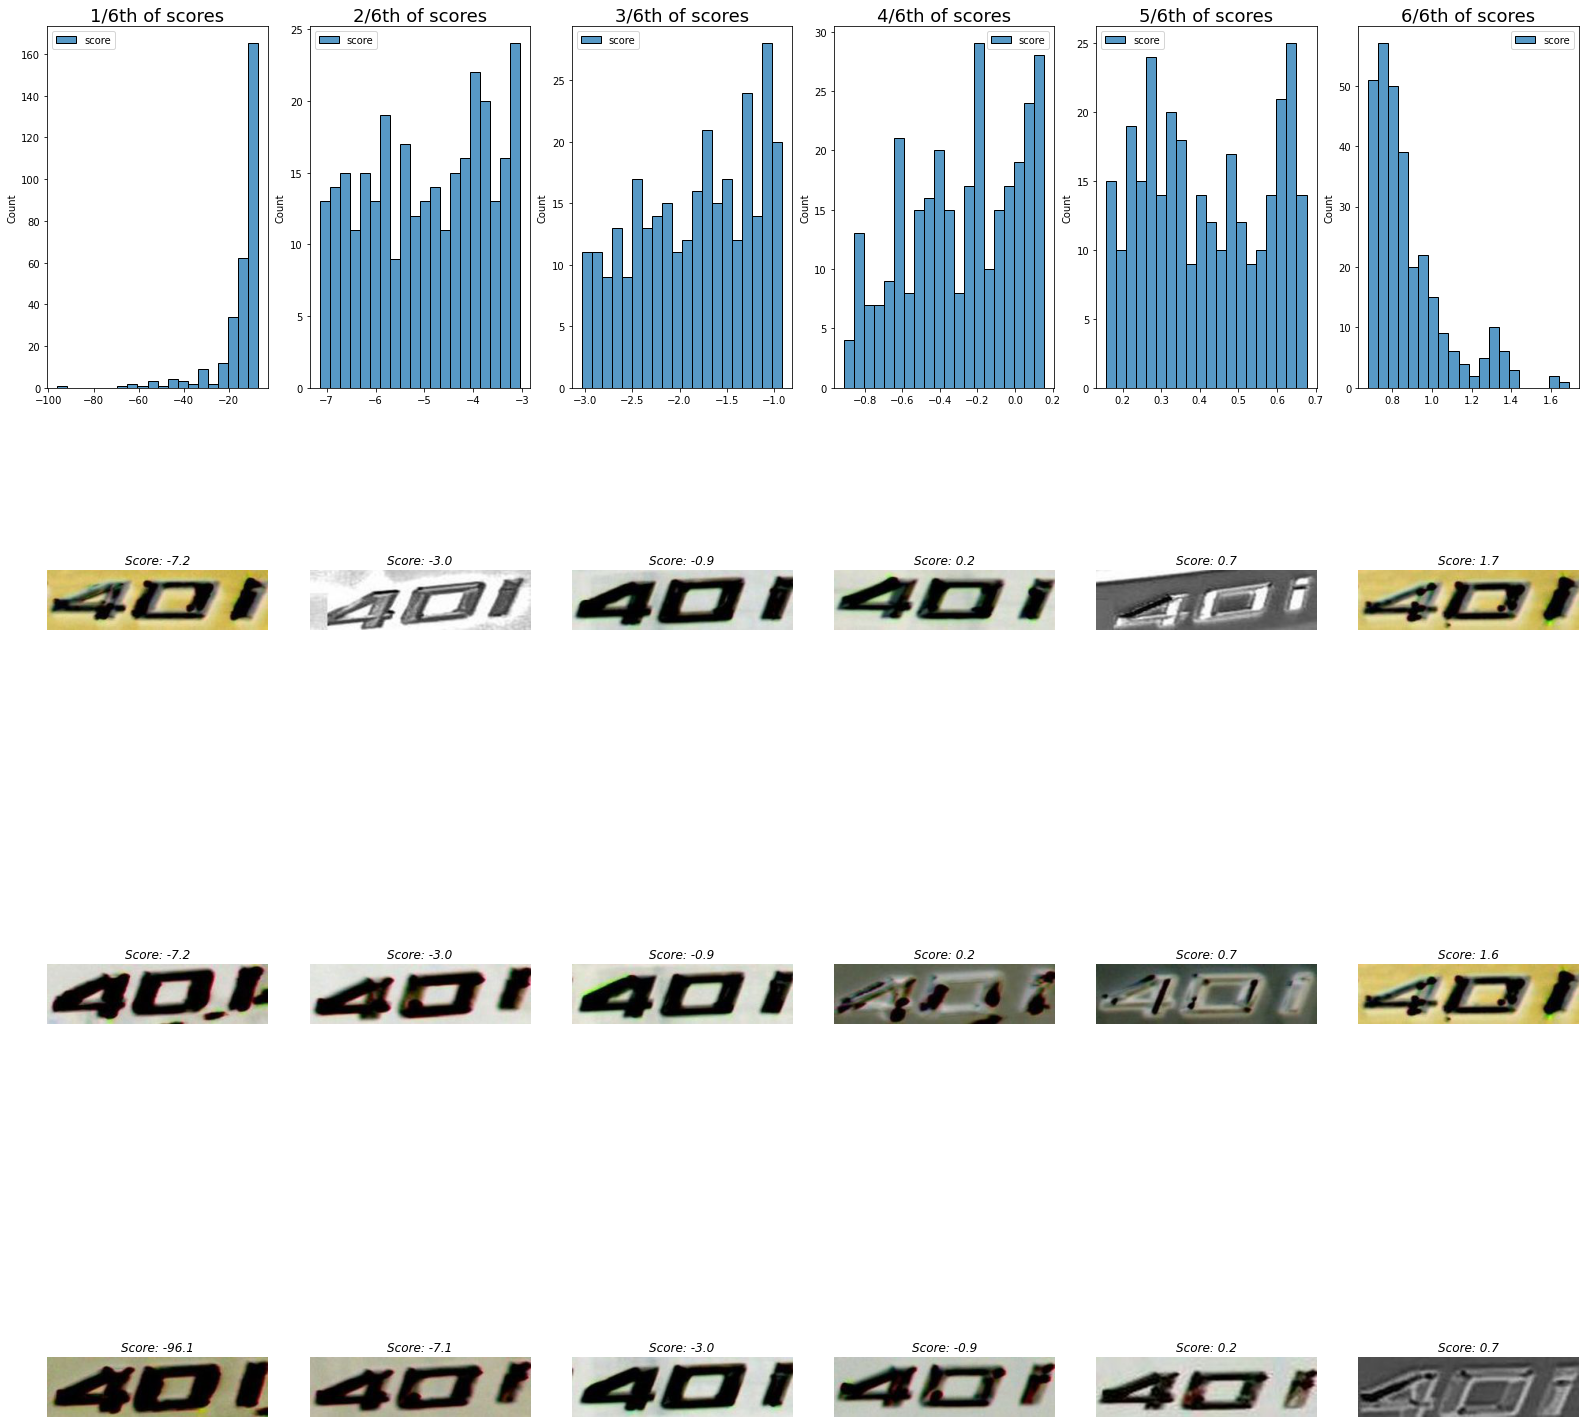

## GMM Model: 320i

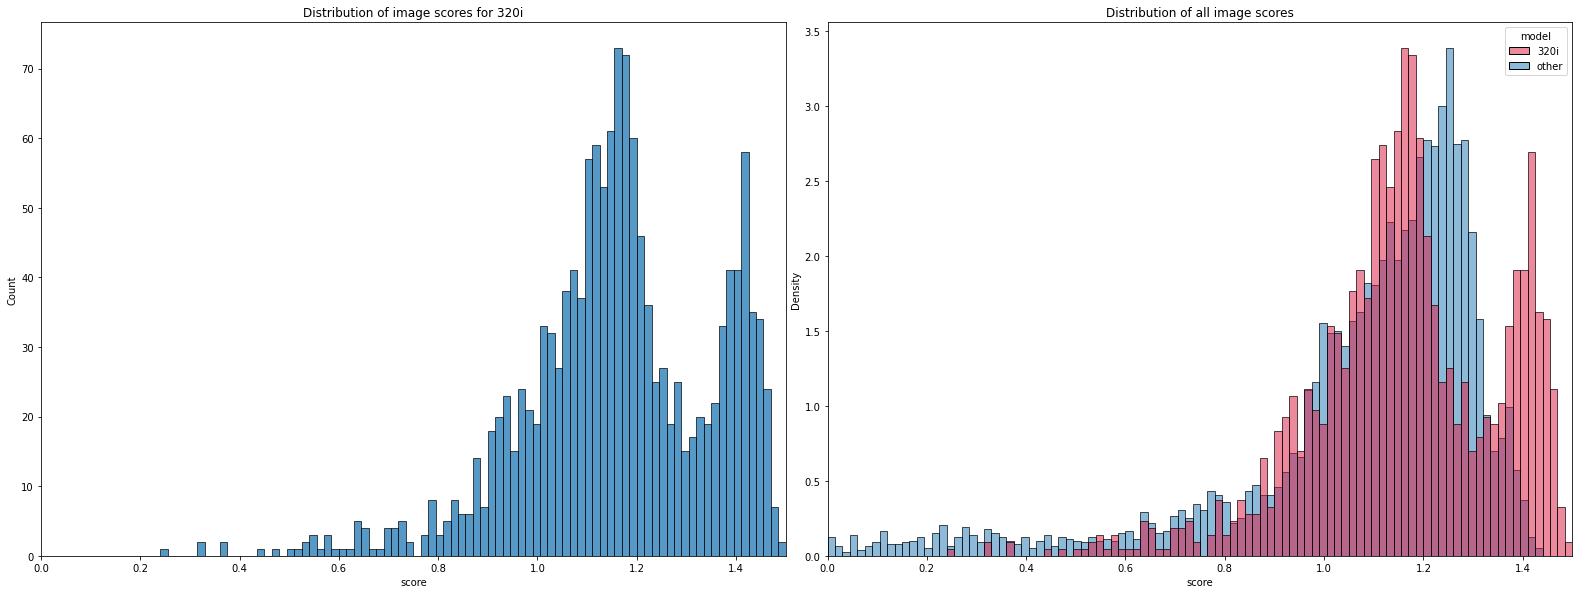

Distribution of scores and best five images for images split into 6 buckets. 
The score is divided by 100 for readability

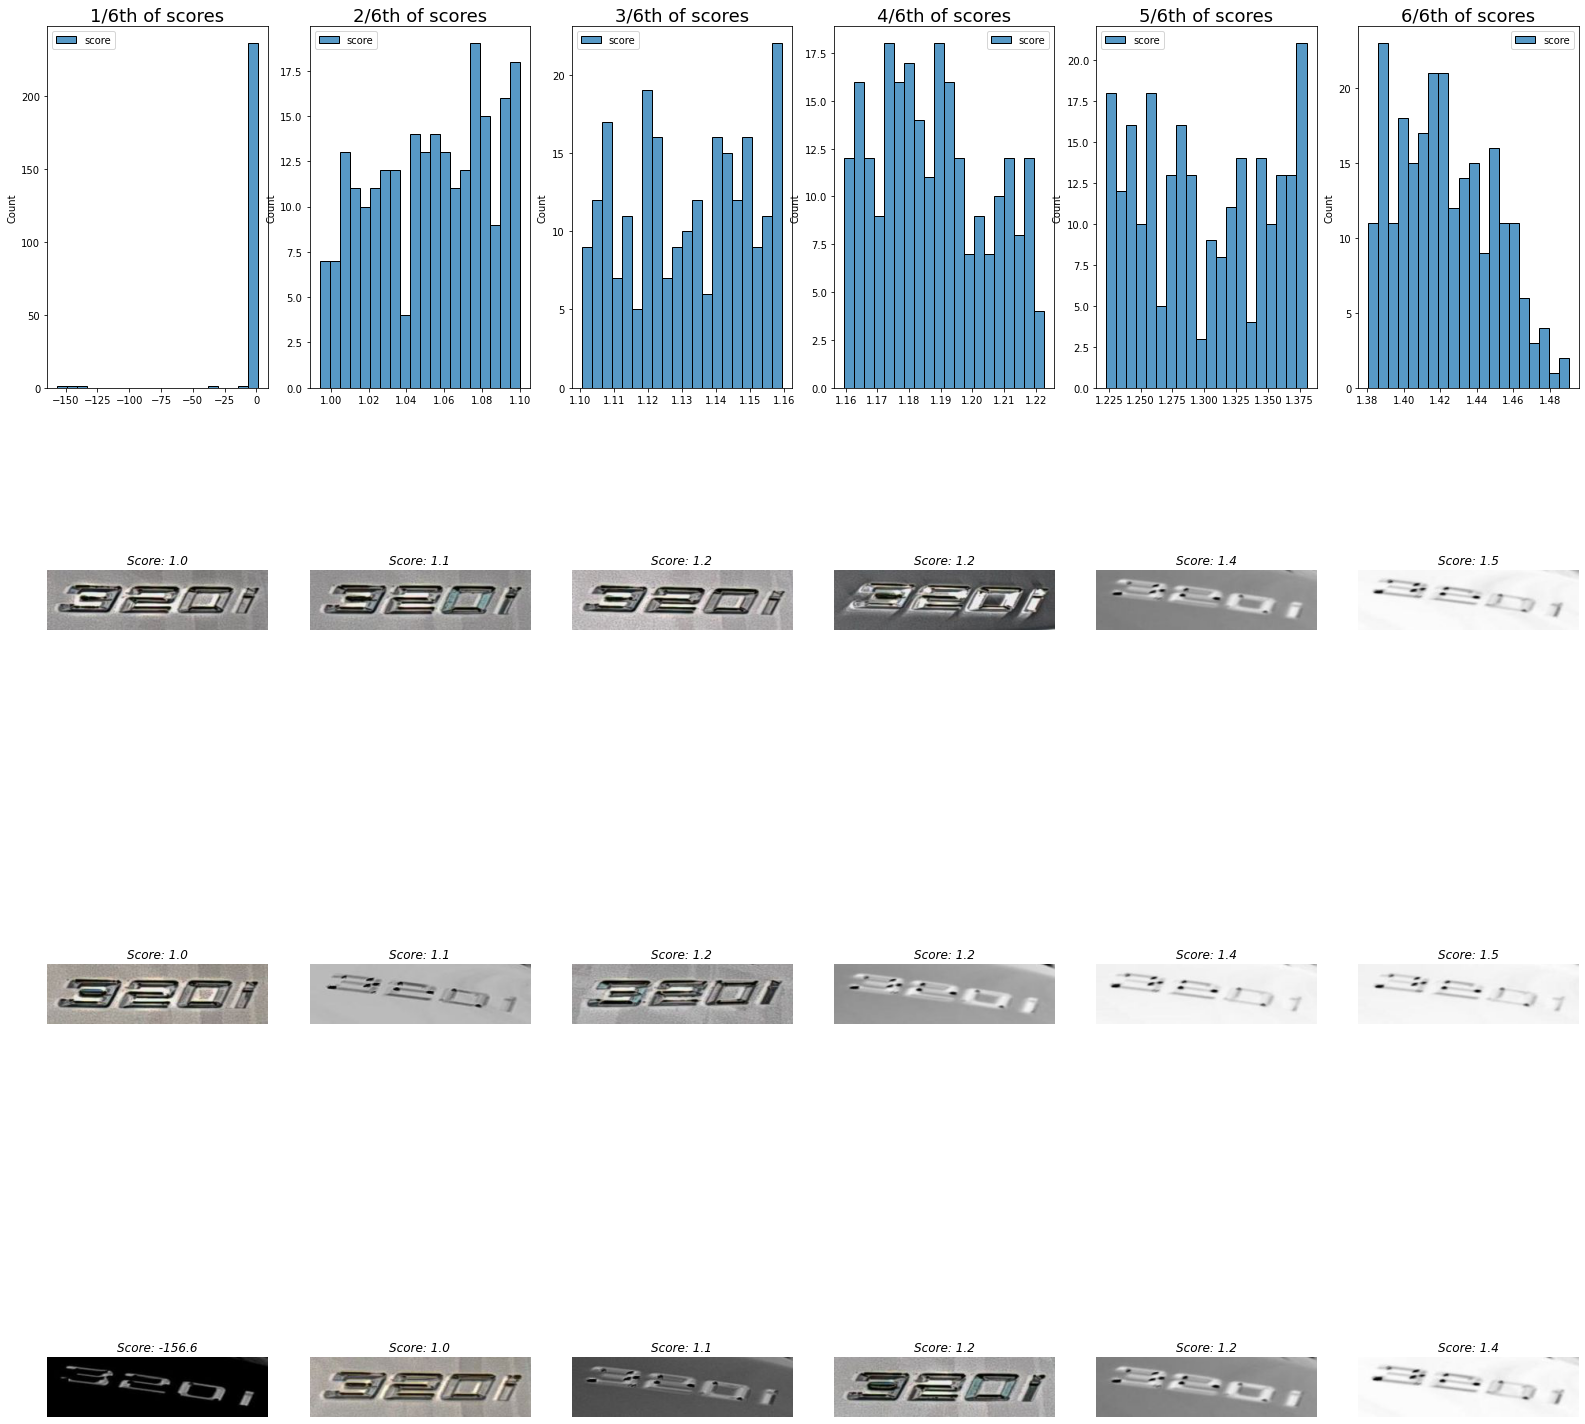

## GMM Model: 330e

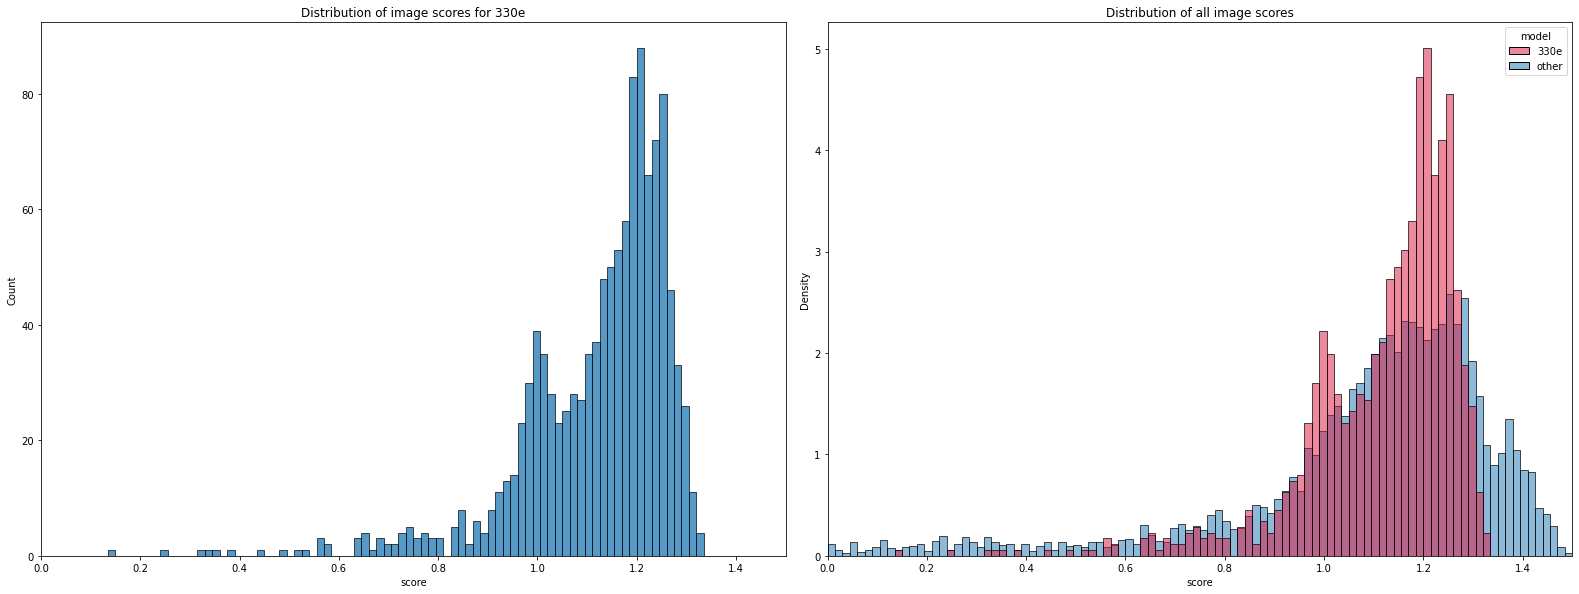

Distribution of scores and best five images for images split into 6 buckets. 
The score is divided by 100 for readability

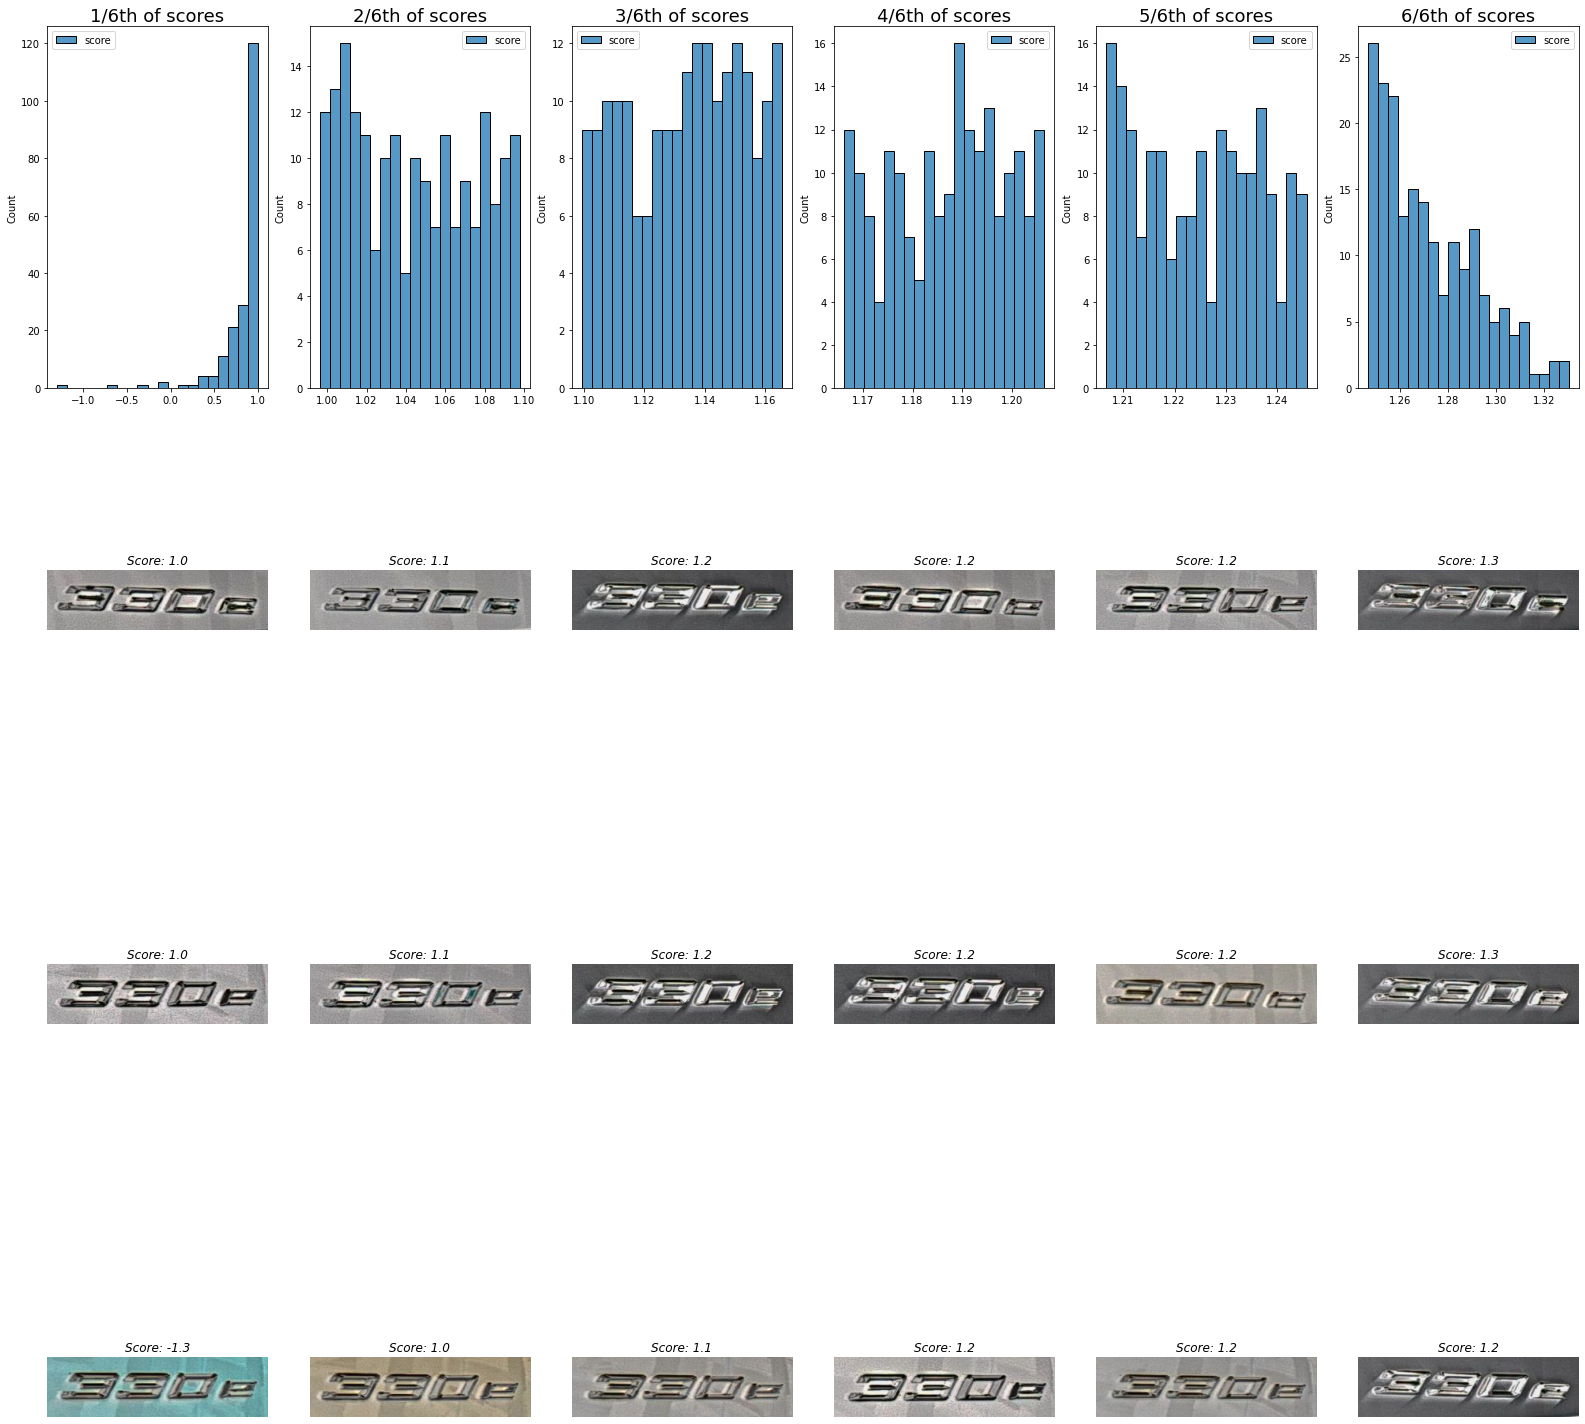

## GMM Model: 730Li

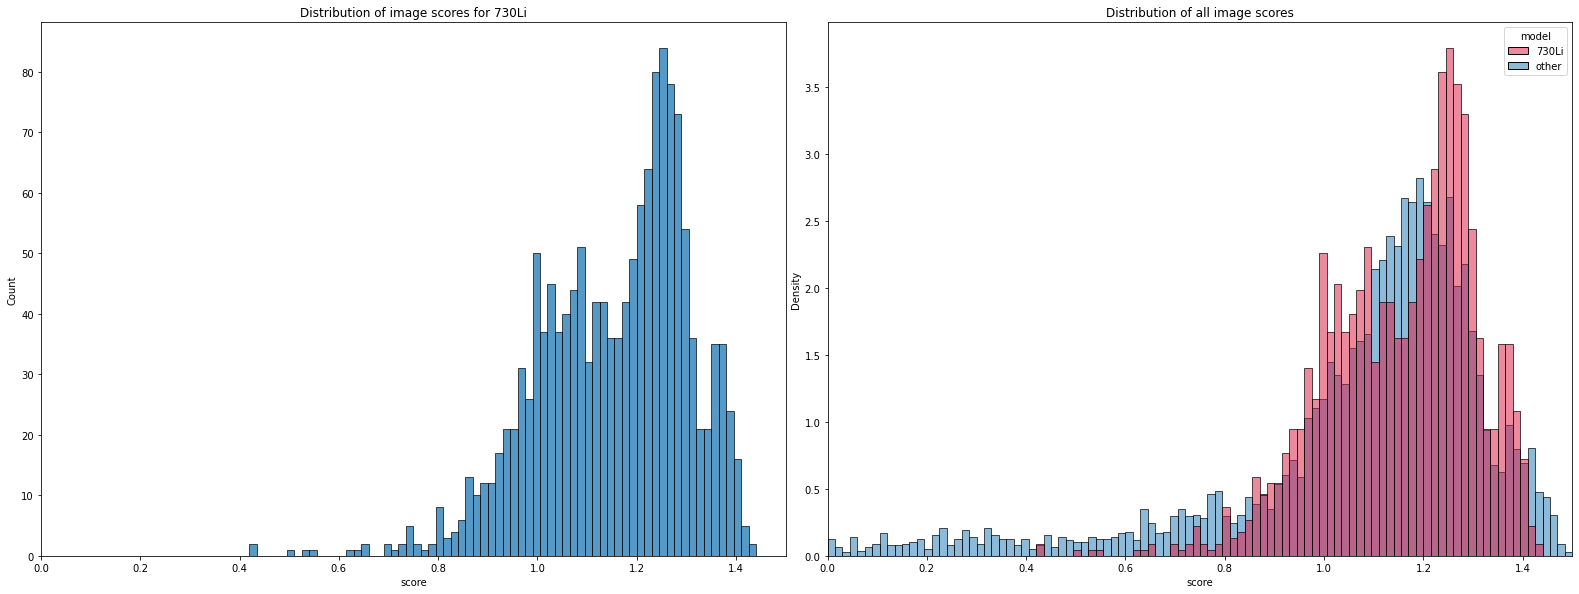

Distribution of scores and best five images for images split into 6 buckets. 
The score is divided by 100 for readability

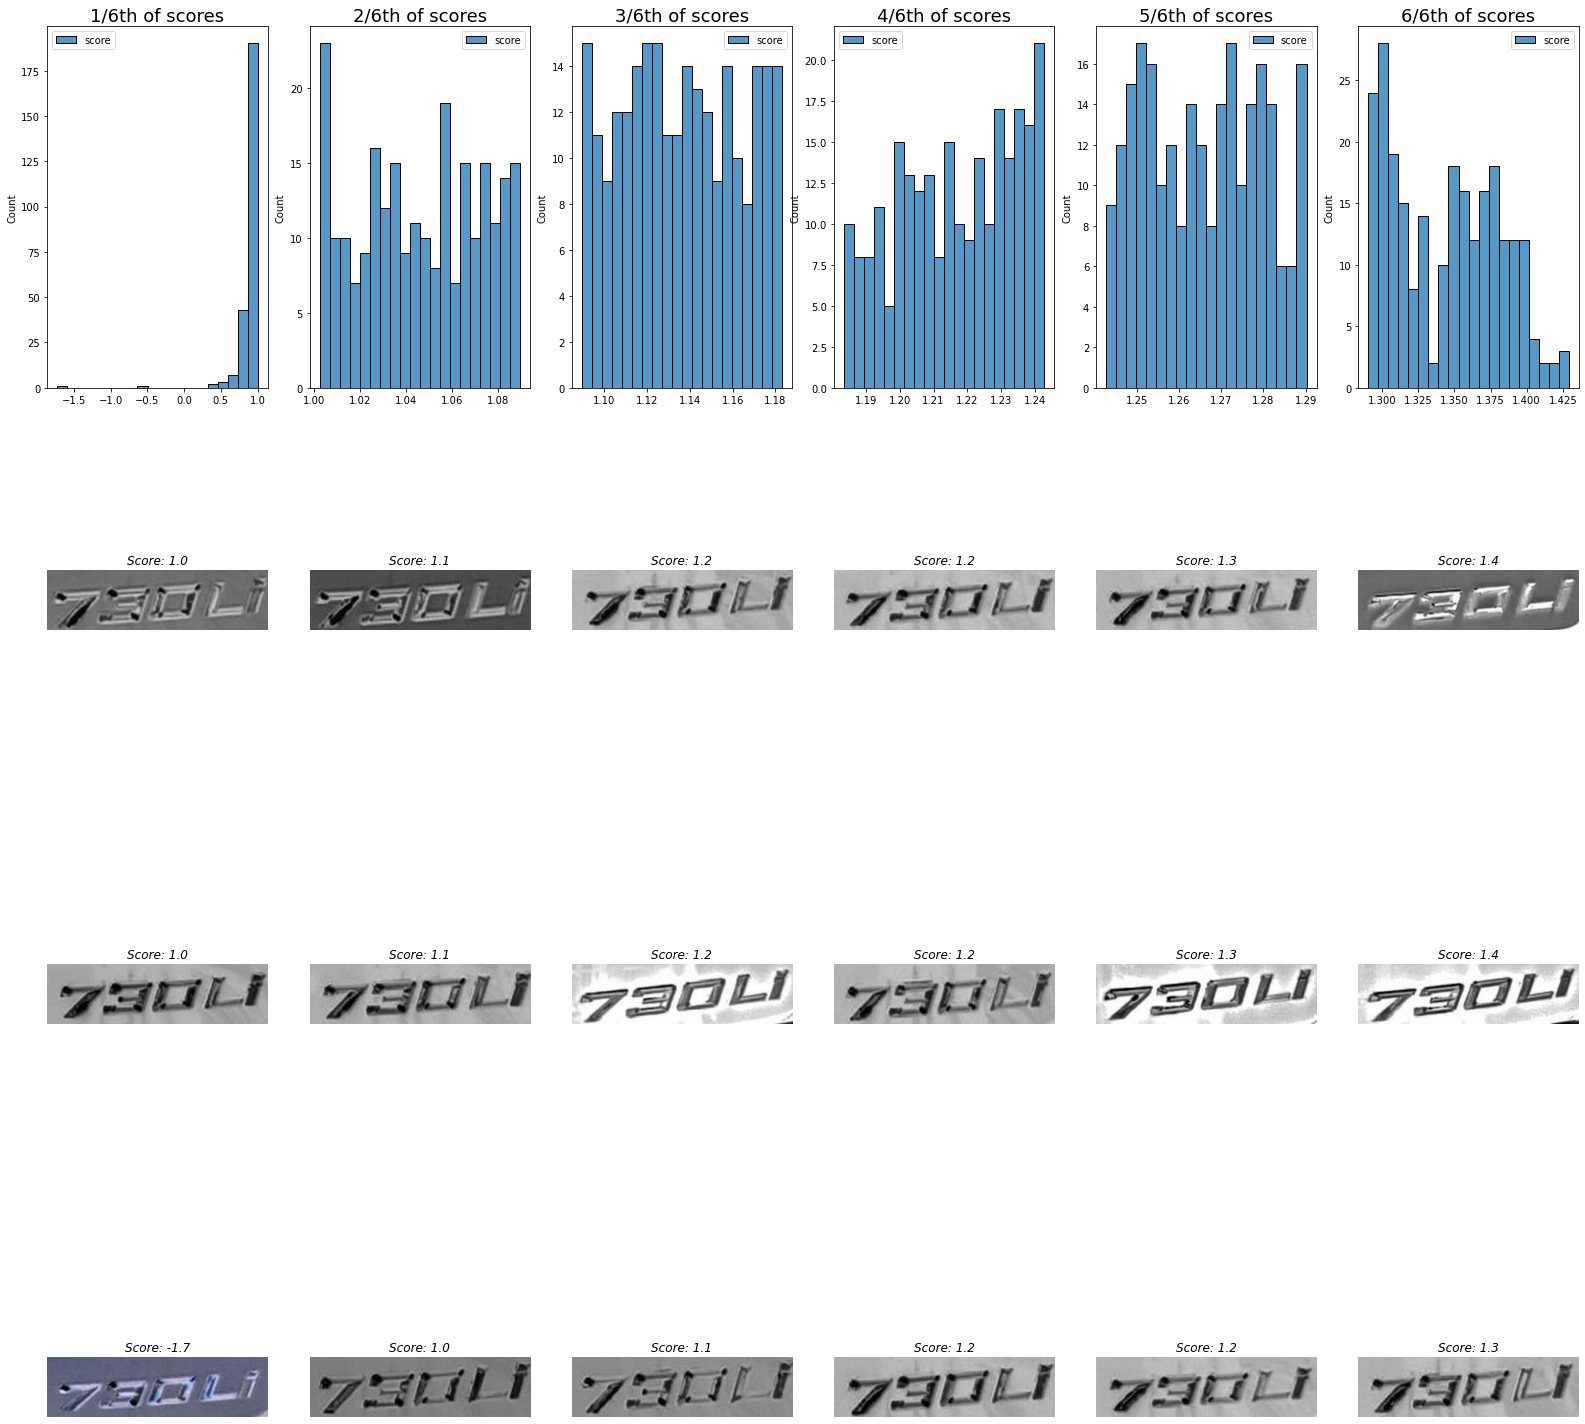

## GMM Model: 740Li

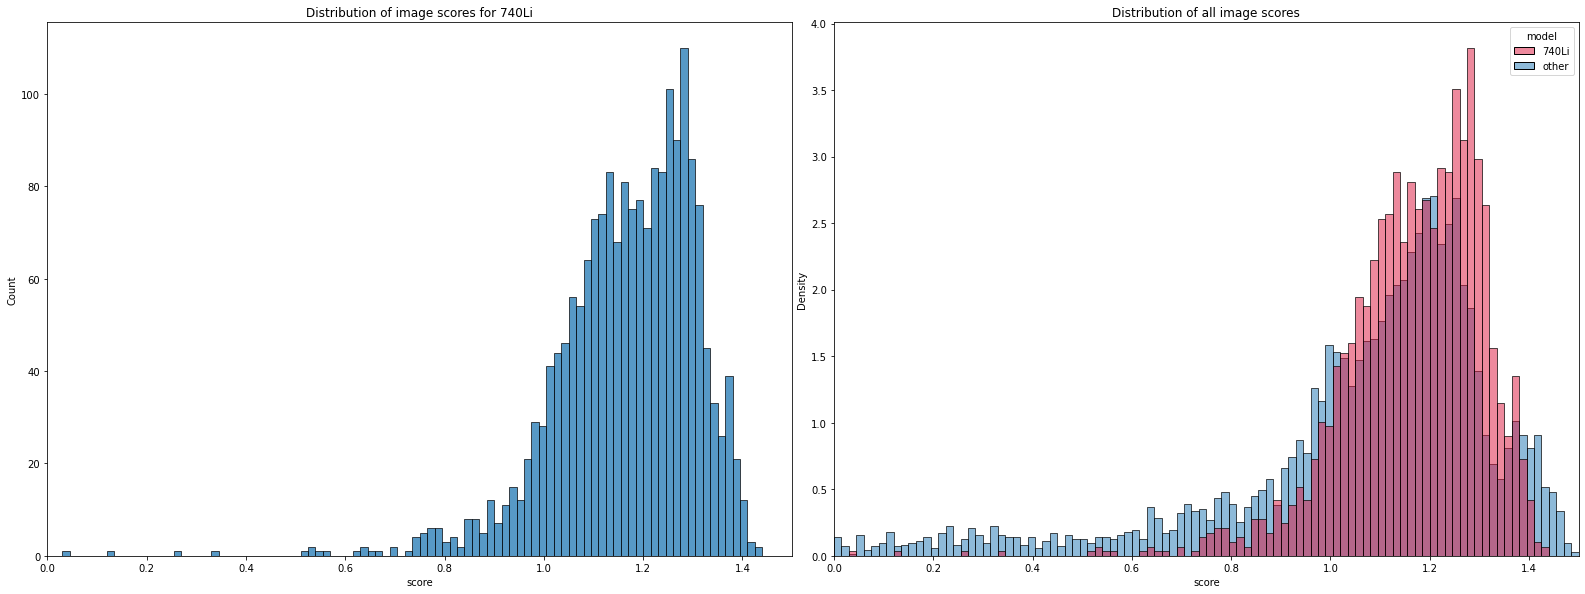

Distribution of scores and best five images for images split into 6 buckets. 
The score is divided by 100 for readability

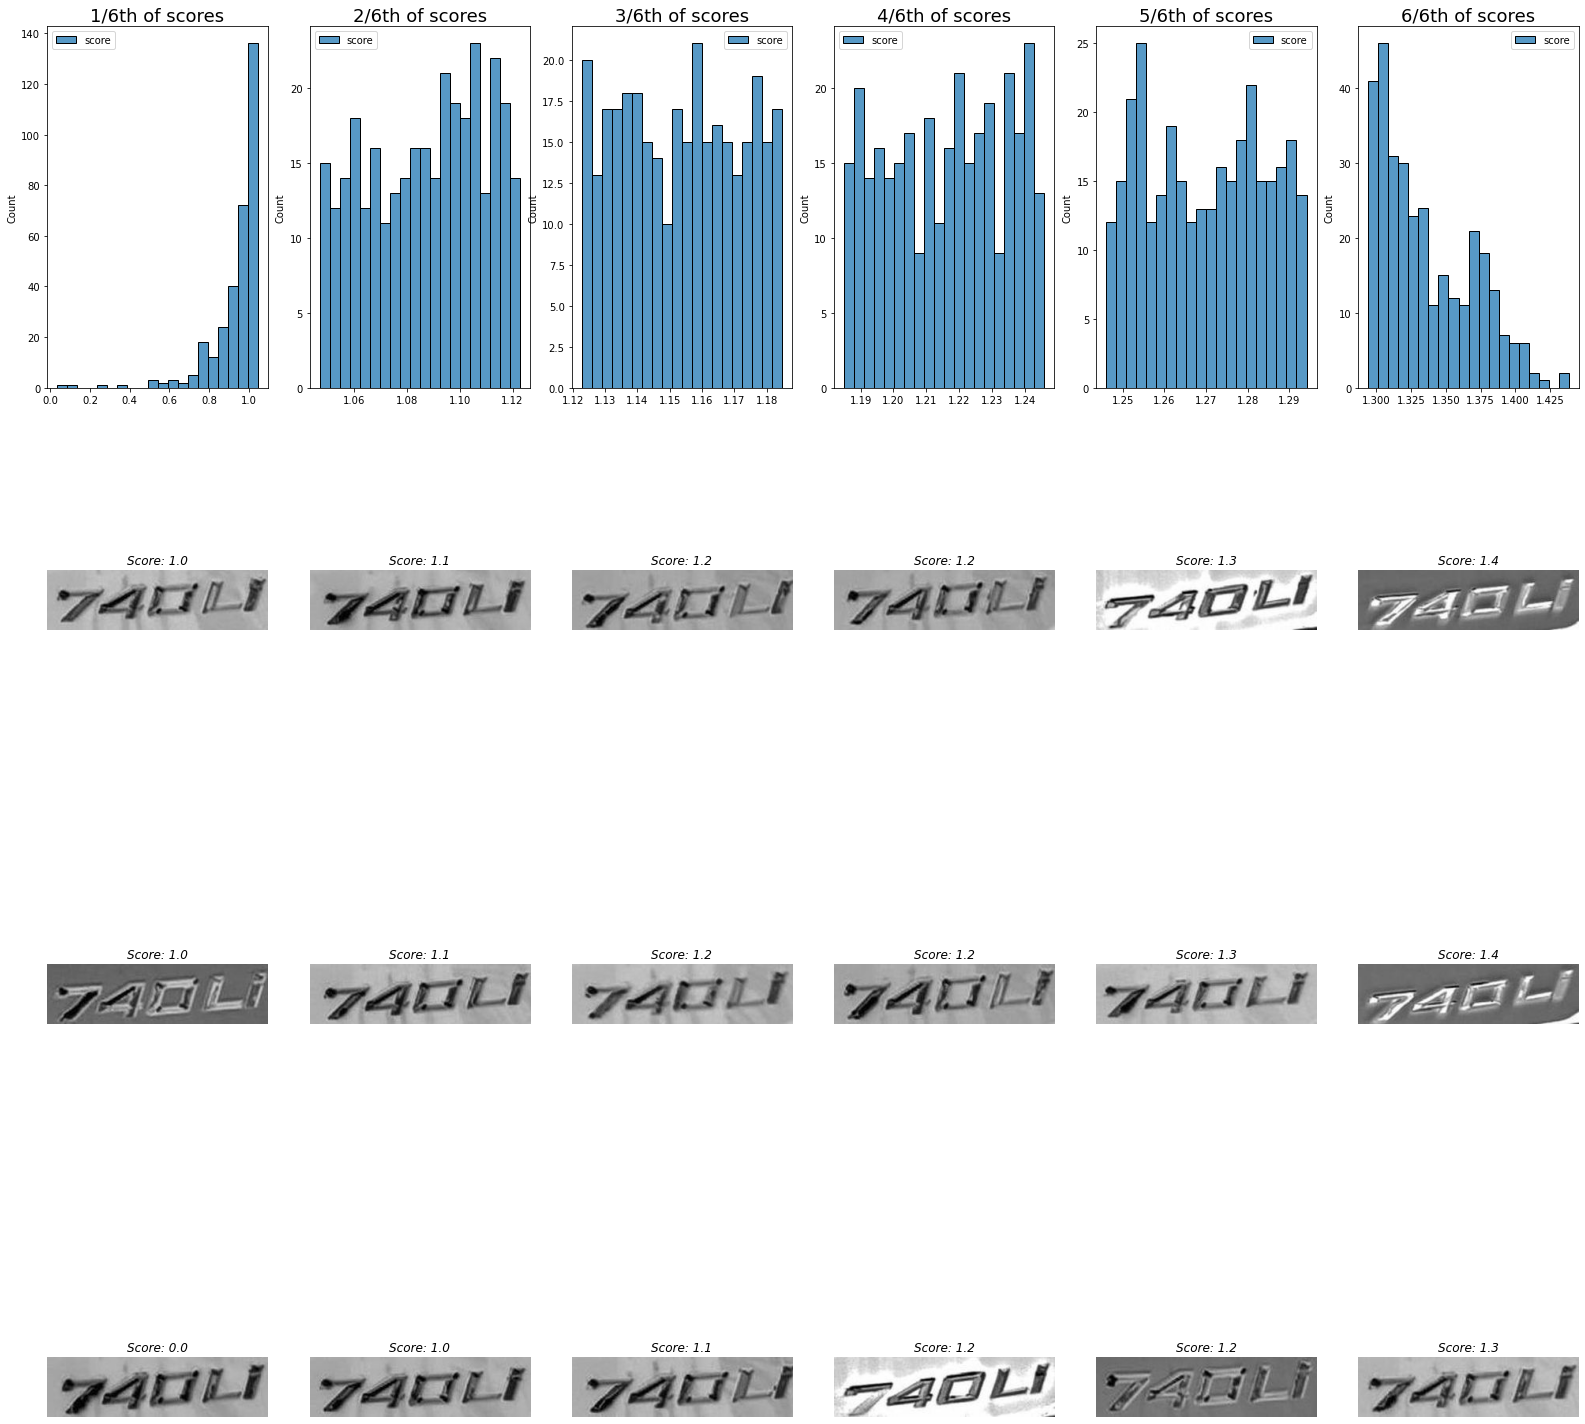

In [4]:
md("# GMM Scores Real images")
md("GMM computation of scores for the models different real images, based on the BMW inception model and CV")


#plotting over all overview
rcParams['figure.figsize'] = [width, 8]
fig, axs = plt.subplots(1, 3)
fig.tight_layout()
_ = sns.histplot(results, x='score',bins=40, binrange=(0,2), hue="model", ax=axs[0]).set(
title="Distribution of overall values",xlim=(0,2))
_ = sns.kdeplot(x=results.score, hue=results.model, ax=axs[1]).set(
        title="Distribution of overall values (KDE)",xlim=(0,2))
_ = sns.boxplot(x=results.model, y=results.score, ax=axs[2]).set(
title="Distribution of overall values (Boxplot)",ylim=(-6,2.5))
plt.show()

for model in models[:]:
    #instantiating necessary data
    model_results=results[results['model']==model].copy()
    labels = list(range(0, bins))
    model_results.loc[:,'score_bin'] = pd.qcut(model_results.score, q=bins)
    model_results.loc[:,'score_bin_nr'] = pd.qcut(model_results.score, q=bins, labels=labels)
    buckets=model_results.score_bin_nr.unique().categories

    md(f"## GMM Model: {model}")
    #plots the image scores for the individual class and plots an overview of the scores of all classes
    if model == "40i":
        xlim=(-20,2)
    else:
        xlim=(0,1.50)

    palette = {"other": "#1f77b4", model: "#dc143c"}

    plot_individual_model_overview(model_results,results,model,width=width,tick=False,xlim=xlim,palette=palette)

    md(f'Distribution of scores and best five images for images split into {len(buckets)} buckets. \nThe score is divided by {divisor} for readability')
    image_path=os.path.join(data_dir,'all_real_images')
    plot_overview(buckets, model_results,image_path,heigth=width,width=width,depth=depth)

# Relationship of scores to amount of GAN training images

## Real Images 

KeyError: 22

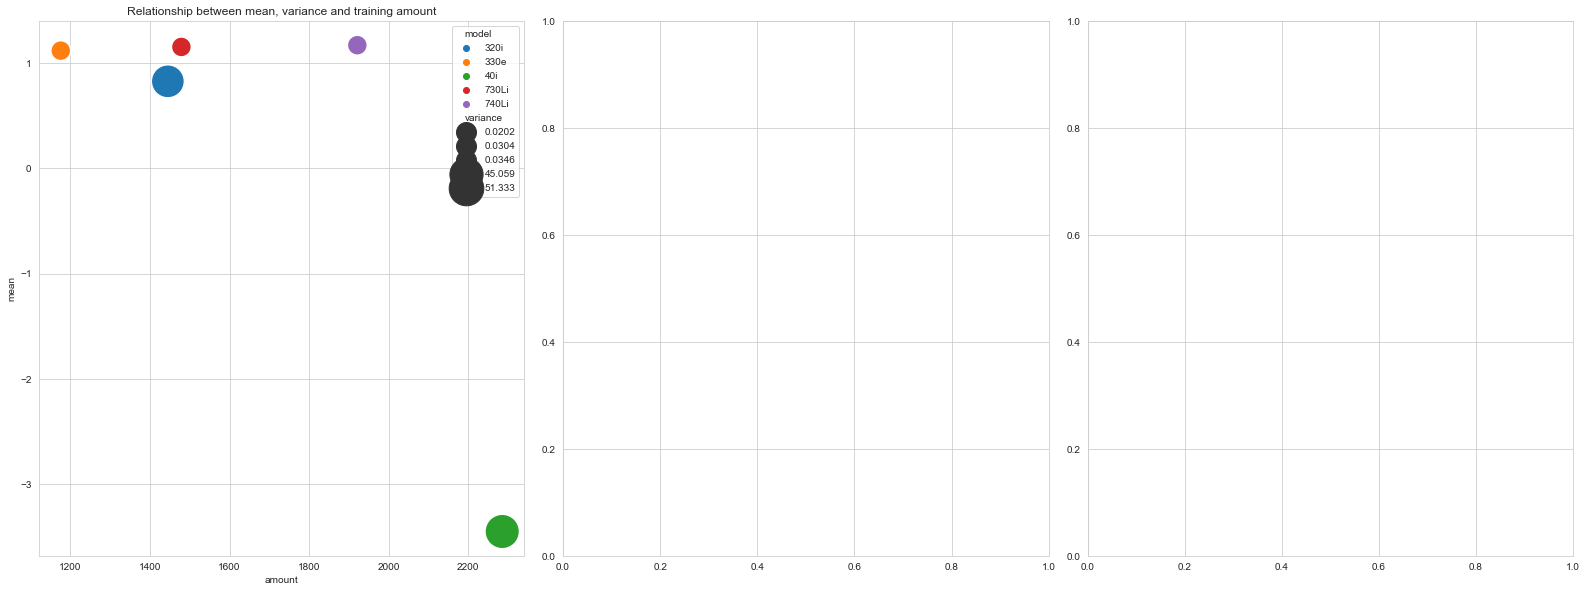

In [3]:
md('# Relationship of scores to amount of GAN training images')
md('## Real Images ')

#Create DF for statistical results of real images and plot it
score_comparison=results.groupby('model',as_index=False).agg(mean=('score','mean'),median=('score','median'),variance=('score','var'))
score_comparison['variance']=score_comparison['variance'].round(4)
score_comparison['amount']=[1445,1176,2285,1479,1921]
plot_score_amount_overview(score_comparison,results,width,xlim=(-10,2))



md('## Generated Images')

#Create DF for statistical results of generated images and plot it
result_dir_bmw=os.path.join(parent_dir,'results',"GMM_BMW")
gmm_dir_bmw=os.path.join(result_dir_bmw,"gmm_res_full")
results_gan=all_model_df(models,gmm_dir_bmw, file_ending="_allticks",include_ticks=True)
score_comparison_gan=results_gan.groupby('model',as_index=False).agg(mean=('score','mean'),median=('score','median'),variance=('score','var'))
score_comparison_gan['variance']=score_comparison_gan['variance'].round(4)
score_comparison_gan['amount']=[1445,1176,2285,1479,1921]

plot_score_amount_overview(score_comparison_gan,results_gan,width,xlim=(-5,0))